In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
%cd gdrive/My Drive/ML_PROJECT
!ls

/content/gdrive/My Drive/ML_PROJECT
amazon_reviews.txt  DTree.pickle      ML_PROJECT.ipynb	Test.ipynb
data.csv	    knn_model.pickle  Test_data


In [ ]:
!pip install textstat

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import textstat
from textstat.textstat import textstat
import nltk
color = sns.color_palette()
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import pickle

from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix

# **Data analysis, Visualization, and Preprocessing**

In [ ]:
data = pd.read_csv("amazon_reviews.txt", delimiter = "\t")

In [ ]:
data.head()

,eDOC_ID,LABEL,RATING,VERIFIED_PURCHASE,PRODUCT_CATEGORY,PRODUCT_ID,PRODUCT_TITLE,REVIEW_TITLE,REVIEW_TEXT
0,1,__label1__,4,N,PC,B00008NG7N,"Targus PAUK10U Ultra Mini USB Keypad, Black",useful,"When least you think so, this product will sav..."
1,2,__label1__,4,Y,Wireless,B00LH0Y3NM,Note 3 Battery : Stalion Strength Replacement ...,New era for batteries,Lithium batteries are something new introduced...
2,3,__label1__,3,N,Baby,B000I5UZ1Q,"Fisher-Price Papasan Cradle Swing, Starlight",doesn't swing very well.,I purchased this swing for my baby. She is 6 m...
3,4,__label1__,4,N,Office Products,B003822IRA,Casio MS-80B Standard Function Desktop Calculator,Great computing!,I was looking for an inexpensive desk calcolat...
4,5,__label1__,4,N,Beauty,B00PWSAXAM,Shine Whitening - Zero Peroxide Teeth Whitenin...,Only use twice a week,I only use it twice a week and the results are...


In [ ]:
data.shape

(21000, 9)

In [ ]:
data.columns

Index(['eDOC_ID', 'LABEL', 'RATING', 'VERIFIED_PURCHASE', 'PRODUCT_CATEGORY',
       'PRODUCT_ID', 'PRODUCT_TITLE', 'REVIEW_TITLE', 'REVIEW_TEXT'],
      dtype='object')

In [ ]:
data.loc[data["LABEL"] == "__label1__", "LABEL"] = '1'
data.loc[data["LABEL"] == "__label2__", "LABEL"] = '0'

In [ ]:
data.LABEL.value_counts()

,count
LABEL,
1,10500
0,10500


In [ ]:
data.eDOC_ID.nunique()

21000

In [ ]:
data.LABEL.unique()

array(['1', '0'], dtype=object)

In [ ]:
cnt_srs = data.groupby(data["LABEL"]).RATING.value_counts()
cnt_srs

LABEL  RATING
0      5         6151
       4         1974
       3          942
       1          868
       2          565
1      5         6059
       4         1999
       3          926
       1          889
       2          627
Name: count, dtype: int64

In [ ]:
data.VERIFIED_PURCHASE.value_counts()

,count
VERIFIED_PURCHASE,
Y,11698
N,9302


In [ ]:
cnt_srs = data.groupby("VERIFIED_PURCHASE").LABEL.value_counts()
cnt_srs

VERIFIED_PURCHASE  LABEL
N                  1        7623
                   0        1679
Y                  0        8821
                   1        2877
Name: count, dtype: int64

In [ ]:
data.PRODUCT_CATEGORY.nunique()

30

In [ ]:
data.PRODUCT_CATEGORY.unique()

array(['PC', 'Wireless', 'Baby', 'Office Products', 'Beauty',
       'Health & Personal Care', 'Toys', 'Kitchen', 'Furniture',
       'Electronics', 'Camera', 'Sports', 'Home', 'Jewelry', 'Books',
       'Grocery', 'Video DVD', 'Tools', 'Home Improvement', 'Shoes',
       'Outdoors', 'Luggage', 'Video Games', 'Apparel', 'Lawn and Garden',
       'Pet Products', 'Home Entertainment', 'Musical Instruments',
       'Watches', 'Automotive'], dtype=object)

In [ ]:
data.PRODUCT_CATEGORY.value_counts()

,count
PRODUCT_CATEGORY,
PC,700
Wireless,700
Baby,700
Office Products,700
Beauty,700
Health & Personal Care,700
Toys,700
Kitchen,700
Furniture,700


In [ ]:
values = data.groupby(data["LABEL"]).PRODUCT_CATEGORY.value_counts()
values

LABEL  PRODUCT_CATEGORY      
0      Apparel                   350
       Automotive                350
       Baby                      350
       Beauty                    350
       Books                     350
       Camera                    350
       Electronics               350
       Furniture                 350
       Grocery                   350
       Health & Personal Care    350
       Home                      350
       Home Entertainment        350
       Home Improvement          350
       Jewelry                   350
       Kitchen                   350
       Lawn and Garden           350
       Luggage                   350
       Musical Instruments       350
       Office Products           350
       Outdoors                  350
       PC                        350
       Pet Products              350
       Shoes                     350
       Sports                    350
       Tools                     350
       Toys                      350
       Video DVD                 350
       Video Games               350
       Watches                   350
       Wireless                  350
1      Apparel                   350
       Automotive                350
       Baby                      350
       Beauty                    350
       Books                     350
       Camera                    350
       Electronics               350
       Furniture                 350
       Grocery                   350
       Health & Personal Care    350
       Home                      350
       Home Entertainment        350
       Home Improvement          350
       Jewelry                   350
       Kitchen                   350
       Lawn and Garden           350
       Luggage                   350
       Musical Instruments       350
       Office Products           350
       Outdoors                  350
       PC                        350
       Pet Products              350
       Shoes                     350
       Sports                    350
       Tools                     350
       Toys                      350
       Video DVD                 350
       Video Games               350
       Watches                   350
       Wireless                  350
Name: count, dtype: int64

In [ ]:
data.PRODUCT_ID.nunique()

18857

In [ ]:
data.PRODUCT_TITLE.nunique()

18865

In [ ]:
data.REVIEW_TITLE.nunique()

18476

In [ ]:
data.REVIEW_TEXT.nunique()

21000

In [ ]:
data2 = data.groupby("LABEL").REVIEW_TEXT

In [ ]:
data['TEXT_LENGTH'] = data['REVIEW_TEXT'].apply(len)

In [ ]:
cnt_srs = data.groupby(["LABEL"]).TEXT_LENGTH.agg(lambda x: sum(x)/len(x))
cnt_srs

,TEXT_LENGTH
LABEL,
0,428.102857
1,316.550000


In [ ]:
data['num_sentences'] = data['REVIEW_TEXT'].apply(lambda x: len(str(x).split('.')))

In [ ]:
data["FK_Score"] = data["REVIEW_TEXT"].apply(textstat.flesch_kincaid_grade)

In [ ]:
cnt_srs = data.groupby(["LABEL"]).FK_Score.agg(lambda x: sum(x)/len(x))
cnt_srs

,FK_Score
LABEL,
0,6.252619
1,6.383114


In [ ]:
nltk.download('stopwords')
wpt = nltk.WordPunctTokenizer()
stop_words = nltk.corpus.stopwords.words('english')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
def stopCount(x):
    sum =0
    for char in x.split():
        sum+= char in stop_words
    return sum

In [ ]:
data['stop_count'] = data['REVIEW_TEXT'].apply(stopCount)

In [ ]:
cnt_srs = data.groupby(["LABEL"]).stop_count.agg(lambda x: sum(x)/len(x))
cnt_srs

,stop_count
LABEL,
0,32.563238
1,24.726476


In [ ]:
def capsCount(x):
    sum =0
    for char in x:
        sum+= char in "QWERTYUIOPASDFGHJKLZXCVBNM"
    return sum

In [ ]:
data['caps_count'] = data['REVIEW_TEXT'].apply(capsCount)

In [ ]:
cnt_srs = data.groupby(["LABEL"]).caps_count.agg(lambda x: sum(x)/len(x))
cnt_srs

,caps_count
LABEL,
0,12.099810
1,8.712667


In [ ]:
data["emojis"] = data["REVIEW_TEXT"].apply(lambda x: 1 if ";)" in x.split() or ":)" in x.split() or ":-)" in x.split() else 0)

In [ ]:
cnt_srs = data.groupby(["LABEL"]).emojis.agg(lambda x: sum(x))
cnt_srs

,emojis
LABEL,
0,107
1,85


In [ ]:
data.head()

,eDOC_ID,LABEL,RATING,VERIFIED_PURCHASE,PRODUCT_CATEGORY,PRODUCT_ID,PRODUCT_TITLE,REVIEW_TITLE,REVIEW_TEXT,TEXT_LENGTH,num_sentences,FK_Score,stop_count,caps_count,emojis
0,1,1,4,N,PC,B00008NG7N,"Targus PAUK10U Ultra Mini USB Keypad, Black",useful,"When least you think so, this product will sav...",116,3,1.9,10,2,0
1,2,1,4,Y,Wireless,B00LH0Y3NM,Note 3 Battery : Stalion Strength Replacement ...,New era for batteries,Lithium batteries are something new introduced...,404,4,12.3,28,4,0
2,3,1,3,N,Baby,B000I5UZ1Q,"Fisher-Price Papasan Cradle Swing, Starlight",doesn't swing very well.,I purchased this swing for my baby. She is 6 m...,248,6,2.6,25,6,0
3,4,1,4,N,Office Products,B003822IRA,Casio MS-80B Standard Function Desktop Calculator,Great computing!,I was looking for an inexpensive desk calcolat...,212,5,4.0,18,6,0
4,5,1,4,N,Beauty,B00PWSAXAM,Shine Whitening - Zero Peroxide Teeth Whitenin...,Only use twice a week,I only use it twice a week and the results are...,331,4,8.3,34,4,0


In [ ]:
data.shape

(21000, 15)

In [ ]:
lenc=LabelEncoder()
data.VERIFIED_PURCHASE=lenc.fit_transform(data.VERIFIED_PURCHASE)
print(lenc.classes_)
print(data.VERIFIED_PURCHASE.unique())

['N' 'Y']
[0 1]


In [ ]:
lenc=LabelEncoder()
data.PRODUCT_CATEGORY = lenc.fit_transform(data.PRODUCT_CATEGORY)
print(lenc.classes_)
print(data.PRODUCT_CATEGORY.unique())

['Apparel' 'Automotive' 'Baby' 'Beauty' 'Books' 'Camera' 'Electronics'
 'Furniture' 'Grocery' 'Health & Personal Care' 'Home'
 'Home Entertainment' 'Home Improvement' 'Jewelry' 'Kitchen'
 'Lawn and Garden' 'Luggage' 'Musical Instruments' 'Office Products'
 'Outdoors' 'PC' 'Pet Products' 'Shoes' 'Sports' 'Tools' 'Toys'
 'Video DVD' 'Video Games' 'Watches' 'Wireless']
[20 29  2 18  3  9 25 14  7  6  5 23 10 13  4  8 26 24 12 22 19 16 27  0
 15 21 11 17 28  1]


In [ ]:
lenc=LabelEncoder()
data.PRODUCT_ID = lenc.fit_transform(data.PRODUCT_ID)
print(lenc.classes_)
print(data.PRODUCT_ID.unique())

['0006486118' '0028703200' '0060159839' ... 'B011MJ2JE2' 'B011WLIG88'
 'B012D9DB9W']
[  988 16286  2463 ...  2118  9977 11924]


In [ ]:
lenc=LabelEncoder()
data.PRODUCT_TITLE = lenc.fit_transform(data.PRODUCT_TITLE)
print(lenc.classes_)
print(data.PRODUCT_TITLE.unique())

['!!Final Clearance!! Silicone BBQ Star Gloves Silicone Heat Resistant Grilling BBQ Gloves for Cooking, Baking, Smoking & Potholder, !One Pair! ** Bonus Inside ** !!Final Clearance!!'
 '# 1 Caralluma Fimbriata 1000mg – Melt Away the weight with this'
 '#000 4x8" KRAFT BUBBLE MAILER PADDED ENVELOPES-100 qty' ...
 '★**PREMIUM CALMER CATS & DOGS**★ We Have The Best,Top Rated 100% Natural K9 & Kitty Calmer Period●Human Grade Natural Ingredients●Rescue Your Pet From Anxiety, Stress Or Use For Shot To Long Travels'
 "★Limited Introduction Offer★ BBQ Grill Brush 12 inch, World's best Stainless steel barbecue Grill Brush-- One of the Best BBQ Accessories and Tools Around - This BBQ Grill Brush is the Perfect Accessory for Cleaning Charcoal, Gas, Electric and Infrared Outdoor BBQ Grills**FDA Certified and LFGB Approved**Money Back Guarantee**As Seen On TV**PRICE WILL GO UP SOON! Don't mis this opportunity!"
 '★★ MASSIVE 32OZ GLUCOSAMINE★★Best Glucosamine,Chondroitin Sulfate & MSM Liquid Complex

In [ ]:
lenc=LabelEncoder()
data.REVIEW_TITLE = lenc.fit_transform(data.REVIEW_TITLE)
print(lenc.classes_)
print(data.REVIEW_TITLE.unique())

['  Works fine for me' '!!!You have to OWN this WATCH!!!' '#1' ...
 '很好like them very much' '非常好' '���� Great Cement����']
[18147  9626 15949 ...  7088 13314  8860]


In [ ]:
data.head()

,eDOC_ID,LABEL,RATING,VERIFIED_PURCHASE,PRODUCT_CATEGORY,PRODUCT_ID,PRODUCT_TITLE,REVIEW_TITLE,REVIEW_TEXT,TEXT_LENGTH,num_sentences,FK_Score,stop_count,caps_count,emojis
0,1,1,4,0,20,988,15950,18147,"When least you think so, this product will sav...",116,3,1.9,10,2,0
1,2,1,4,1,29,16286,11247,9626,Lithium batteries are something new introduced...,404,4,12.3,28,4,0
2,3,1,3,0,2,2463,5867,15949,I purchased this swing for my baby. She is 6 m...,248,6,2.6,25,6,0
3,4,1,4,0,18,6172,3278,5549,I was looking for an inexpensive desk calcolat...,212,5,4.0,18,6,0
4,5,1,4,0,3,17440,14494,10593,I only use it twice a week and the results are...,331,4,8.3,34,4,0


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
vec=TfidfVectorizer(max_features=10000)

In [ ]:
Rev_Vector = vec.fit_transform(data.REVIEW_TEXT.values).toarray()

In [ ]:
Rev_Vector.shape

(21000, 10000)

In [ ]:
Rev_Vector = pd.DataFrame(Rev_Vector)

In [ ]:
Rev_Vector.head()

,0,1,2,3,4,5,6,7,8,9,...,9990,9991,9992,9993,9994,9995,9996,9997,9998,9999
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
data = pd.concat([data, Rev_Vector], axis=1)

In [ ]:
data.shape

(21000, 10015)

In [ ]:
data.head()

,eDOC_ID,LABEL,RATING,VERIFIED_PURCHASE,PRODUCT_CATEGORY,PRODUCT_ID,PRODUCT_TITLE,REVIEW_TITLE,REVIEW_TEXT,TEXT_LENGTH,...,9990,9991,9992,9993,9994,9995,9996,9997,9998,9999
0,1,1,4,0,20,988,15950,18147,"When least you think so, this product will sav...",116,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2,1,4,1,29,16286,11247,9626,Lithium batteries are something new introduced...,404,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3,1,3,0,2,2463,5867,15949,I purchased this swing for my baby. She is 6 m...,248,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4,1,4,0,18,6172,3278,5549,I was looking for an inexpensive desk calcolat...,212,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5,1,4,0,3,17440,14494,10593,I only use it twice a week and the results are...,331,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
#data.to_csv('data.csv', index= False)

In [ ]:
data = pd.read_csv('data.csv')

In [ ]:
y = data['LABEL']

In [ ]:
y.shape

(21000,)

In [ ]:
y.head(20)

,LABEL
0,1
1,1
2,1
3,1
4,1
5,1
6,1
7,1
8,1
9,1


In [ ]:
y.value_counts()

,count
LABEL,
1,10500
0,10500


In [ ]:
X = data.drop(['LABEL', 'REVIEW_TEXT'], axis = 1)

In [ ]:
X.shape

(21000, 10013)

In [ ]:
X.head()

,eDOC_ID,RATING,VERIFIED_PURCHASE,PRODUCT_CATEGORY,PRODUCT_ID,PRODUCT_TITLE,REVIEW_TITLE,TEXT_LENGTH,num_sentences,FK_Score,...,9990,9991,9992,9993,9994,9995,9996,9997,9998,9999
0,1,4,0,20,988,15950,18147,116,3,1.9,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2,4,1,29,16286,11247,9626,404,4,12.3,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3,3,0,2,2463,5867,15949,248,6,2.6,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4,4,0,18,6172,3278,5549,212,5,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5,4,0,3,17440,14494,10593,331,4,8.3,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X, y, test_size=0.2,shuffle=True)

In [ ]:
X_train.shape

(16800, 10013)

In [ ]:
X_test.shape

(4200, 10013)

# **KNN**



In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
knn = KNeighborsClassifier(n_neighbors=1)

In [ ]:
X_train.columns = X_train.columns.astype(str)

In [ ]:
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [ ]:
y_pred=knn.predict(X_test)

In [ ]:
accuracy = np.mean(y_pred == y_test)

In [ ]:
filename = "knn_model.pickle"

pickle.dump(knn, open(filename, "wb"))

In [ ]:
knn_model = pickle.load(open("knn_model.pickle", "rb"))

In [ ]:
y_pred=knn_model.predict(X_test)

<Axes: >

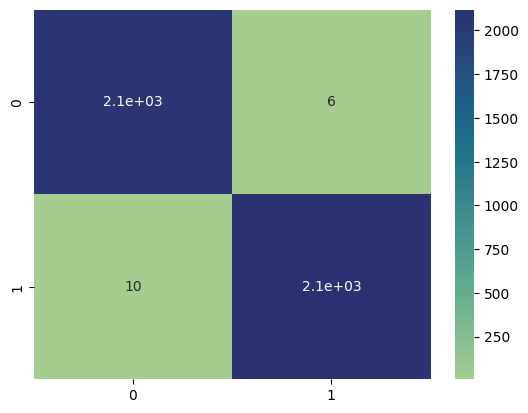

In [ ]:
cf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(cf_matrix, annot=True, cmap="crest")

In [ ]:
cf_matrix

array([[2065,    6],
       [  10, 2119]])

In [ ]:
print("Accuracy: ",accuracy_score(y_test, y_pred))
print("Precision: ",precision_score(y_test, y_pred))
print("Recall score: ",recall_score(y_test, y_pred))
print("F1 score: ",f1_score(y_test, y_pred))

Accuracy:  0.9997619047619047
Precision:  0.9995291902071564
Recall score:  1.0
F1 score:  0.9997645396750647


# **Decision Tree**

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
tree = DecisionTreeClassifier(max_depth=10)
tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=10)

In [ ]:
y_train_tree = tree.predict(X_train)
y_test_tree = tree.predict(X_test)

In [ ]:
filename = "DTree.pickle"

# save model
pickle.dump(tree, open(filename, "wb"))

In [ ]:
dt_model=pickle.load(open("DTree.pickle","rb"))

In [ ]:
y_pred = tree.predict(X_test)

<Axes: >

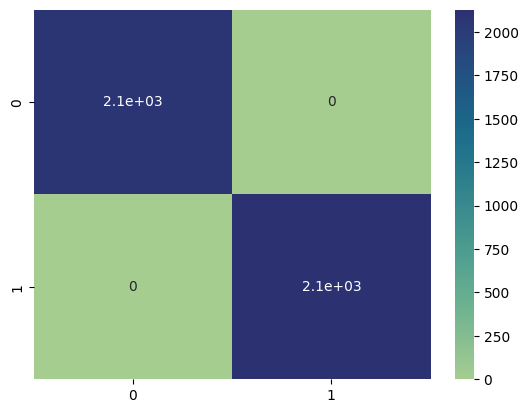

In [ ]:
cf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(cf_matrix, annot=True, cmap="crest")

In [ ]:
cf_matrix

array([[2071,    0],
       [   0, 2129]])

In [ ]:
print ('Accuracy:', accuracy_score(y_test, y_test_tree))
print ('F1 score:', f1_score(y_test, y_test_tree))
print ('Recall:', recall_score(y_test, y_test_tree))
print ('Precision:', precision_score(y_test, y_test_tree))

Accuracy: 0.9997619047619047
F1 score: 0.9997645396750647
Recall: 1.0
Precision: 0.9995291902071564
